In [1]:
import pandas as pd
import numpy as np
import equalization

# Выравнивание температуры

## Получение данных

In [2]:
fileIn = "Data/s_1_SiO2_Al2O3.dat" # Входной файл
fileOut = "Data/e_1_SiO2_Al2O3.dat" # Выходной файл

Считываем данные из файла fileIn.

In [3]:
data = pd.read_csv(fileIn, index_col=0, dtype=np.double)
data.head()

,SiO2,Au/SiO2,Al2O3,Au/Al2O3
Time,,,,
0.000000,21.980776,21.995436,21.793693,21.840987
0.009744,21.980565,21.995238,21.793814,21.841067
0.019488,21.980355,21.995041,21.793935,21.841147
0.029232,21.980144,21.994844,21.794056,21.841228
0.038976,21.979934,21.994647,21.794177,21.841308


In [4]:
data.plot();

## Выравнивание температуры

Построим линию эквализации для того, чтобы избавиться от "плавающей" температуры.  
Уравнение для прямой плавающей температуры записывается в следующем виде:  
$y=kx=\frac{y(f) - y(0)}{N}x$,  
где f - время в конце, N - количество измерений.  
Нам нужна выровненная прямая:  
$y=e$,  
где e - точка сдвига равновесия, относительно которой будет строиться линия эквализации.  
В итоге, прямая эквализации будет записана в виде:  
$y=\frac{y(f) - y(0)}{N}x+e$

Посмотрим, как выглядит прямая для образца SiO2.

In [5]:
column = "SiO2"

Определим точку равновесия как температуру в середине графика.

In [6]:
point = (data[column].iloc[0] + data[column].iloc[-1]) / 2
point

21.959438325366968

In [7]:
ql = equalization.equalization_line(data, column, point)

Выведем график прямой.

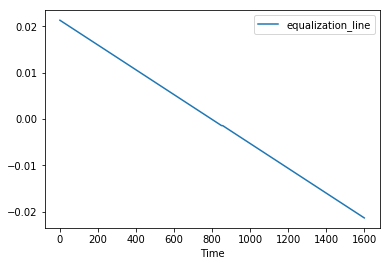

In [8]:
ql.plot();

Эквализация будет проходить следующим образом: из данных каждого образца вычитается своя линия эквализации. Таким образом, получаются графики без "плавающей" температуры.

Зададим точки равновесия температурой в середине графиков.

In [9]:
ep = {}
for key in data.keys():
    ep[key] = (data[key].iloc[0] + data[key].iloc[-1]) / 2

In [10]:
ep

{'SiO2': 21.959438325366968,
 'Au/SiO2': 21.983064920964395,
 'Al2O3': 21.87192520833655,
 'Au/Al2O3': 21.912334217182757}

Так же, точки можно задать температурой явно:

In [11]:
#ep = {}
#ep["SiO2"] = 22.0
#ep["Au/SiO2"] = 24.2
#ep["Al2O3"] = 26.0
#ep["Au/Al2O3"] = 21.5

Или по времени:

In [12]:
#ep = {}
#time = 800
#ep["SiO2"] = data["SiO2"][0:time].iloc[-1]
#ep["Au/SiO2"] = data["Au/SiO2"][0:time].iloc[-1]
#ep["Al2O3"] = data["Al2O3"][0:time].iloc[-1]
#ep["Au/Al2O3"] = data["Au/Al2O3"][0:time].iloc[-1]

Произведем эквализацию.

In [13]:
equalized = equalization.equalization(data, ep)

Начальные данные и эквализированный график, соответственно:


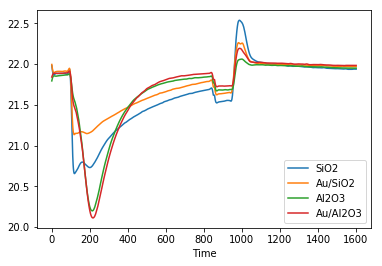

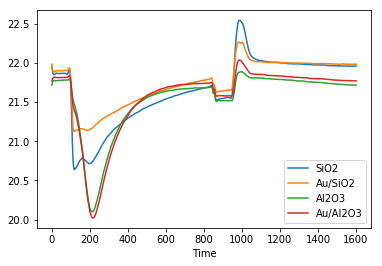

In [14]:
print("Начальные данные и эквализированный график, соответственно:")
data.plot();
equalized.plot();

## Экспорт данных

Экспортируем эквализированные данные в файл fileOut.

In [15]:
equalized.to_csv(fileOut)